# Logical Post Selection Exploration
## This notebook is for creating all data and figures related to logical post selection (LPS) in the sense of when is it good
### Final graphs should look something like:
![title](images/repetativeCNOT_NgConst_FidThresh.png)
![title](images/repetativeCNOT_T2Const_Fid.png)
![title](images/repetativeCNOT_NgConst_Li.png)

imports

In [1]:
from qutip import *
from qiskit import *
import numpy as np
from simulators.BigStepSimulation import EfficientQuantumRegister
from simulators.SmallStepSimulation import InCoherentQuantumRegister
import matplotlib.pyplot as plt
import os
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
print('all packages imported')

hi
all packages imported


The following cell defines all relevant constants, vectors and functions for this notebook

In [2]:
z1 = tensor([basis(2,0) for i in range(5)])
z2 = tensor([basis(2,0) if i in {1,2,4} else basis(2,1) for i in range(5)])
z3 = tensor([basis(2,0) if i in {0,2,3} else basis(2,1) for i in range(5)])
z4 = tensor([basis(2,0) if i in {1,3,4} else basis(2,1) for i in range(5)])
z5 = tensor([basis(2,0) if i in {0,2,4} else basis(2,1) for i in range(5)])
z6 = tensor([basis(2,0) if i in {2} else basis(2,1) for i in range(5)])
z7 = tensor([basis(2,0) if i in {0,1,4} else basis(2,1) for i in range(5)])
z8 = tensor([basis(2,0) if i in {2,3,4} else basis(2,1) for i in range(5)])
z9 = tensor([basis(2,0) if i in {3} else basis(2,1) for i in range(5)])
z10 = tensor([basis(2,0) if i in {0,1,2} else basis(2,1) for i in range(5)])
z11 = tensor([basis(2,0) if i in {4} else basis(2,1) for i in range(5)])
z12 = tensor([basis(2,0) if i in {0} else basis(2,1) for i in range(5)])
z13 = tensor([basis(2,0) if i in {1,2,3} else basis(2,1) for i in range(5)])
z14 = tensor([basis(2,0) if i in {0,3,4} else basis(2,1) for i in range(5)])
z15 = tensor([basis(2,0) if i in {1} else basis(2,1) for i in range(5)])
z16 = tensor([basis(2,0) if i in {0,1,3} else basis(2,1) for i in range(5)])

o1 = tensor([basis(2,1) for i in range(5)])
o2 = tensor([basis(2,1) if i in {1,2,4} else basis(2,0) for i in range(5)])
o3 = tensor([basis(2,1) if i in {0,2,3} else basis(2,0) for i in range(5)])
o4 = tensor([basis(2,1) if i in {1,3,4} else basis(2,0) for i in range(5)])
o5 = tensor([basis(2,1) if i in {0,2,4} else basis(2,0) for i in range(5)])
o6 = tensor([basis(2,1) if i in {2} else basis(2,0) for i in range(5)])
o7 = tensor([basis(2,1) if i in {0,1,4} else basis(2,0) for i in range(5)])
o8 = tensor([basis(2,1) if i in {2,3,4} else basis(2,0) for i in range(5)])
o9 = tensor([basis(2,1) if i in {3} else basis(2,0) for i in range(5)])
o10 = tensor([basis(2,1) if i in {0,1,2} else basis(2,0) for i in range(5)])
o11 = tensor([basis(2,1) if i in {4} else basis(2,0) for i in range(5)])
o12 = tensor([basis(2,1) if i in {0} else basis(2,0) for i in range(5)])
o13 = tensor([basis(2,1) if i in {1,2,3} else basis(2,0) for i in range(5)])
o14 = tensor([basis(2,1) if i in {0,3,4} else basis(2,0) for i in range(5)])
o15 = tensor([basis(2,1) if i in {1} else basis(2,0) for i in range(5)])
o16 = tensor([basis(2,1) if i in {0,1,3} else basis(2,0) for i in range(5)])

logical_0 = 1/4*(z1+z2+z3+z4+z5-z6-z7-z8-z9-z10-z11-z12-z13-z14-z15+z16)
logical_1 = 1/4*(o1+o2+o3+o4+o5-o6-o7-o8-o9-o10-o11-o12-o13-o14-o15+o16)
logic_plus = (logical_0+logical_1)/np.sqrt(2)
logic_plus_dm = logic_plus*logic_plus.dag()

def debugLogical(state):
    """
    :param state: register state for the 5 qubit code+sensor as density matrix
    :return: logical density matrix
    """
    zLz = tensor([logical_0,basis(2,0)])
    oLz = tensor([logical_1,basis(2,0)])
    zLo = tensor([logical_0,basis(2,1)])
    oLo = tensor([logical_1,basis(2,1)])

    a00 = (zLz.dag()*state*zLz).data[0,0]
    a01 = (zLz.dag()*state*zLo).data[0,0]
    a02 = (zLz.dag()*state*oLz).data[0,0]
    a03 = (zLz.dag()*state*oLo).data[0,0]
    a10 = (zLo.dag()*state*zLz).data[0,0]
    a11 = (zLo.dag()*state*zLo).data[0,0]
    a12 = (zLo.dag()*state*oLz).data[0,0]
    a13 = (zLo.dag()*state*oLo).data[0,0]
    a20 = (oLz.dag()*state*zLz).data[0,0]
    a21 = (oLz.dag()*state*zLo).data[0,0]
    a22 = (oLz.dag()*state*oLz).data[0,0]
    a23 = (oLz.dag()*state*oLo).data[0,0]
    a30 = (oLo.dag()*state*zLz).data[0,0]
    a31 = (oLo.dag()*state*zLo).data[0,0]
    a32 = (oLo.dag()*state*oLz).data[0,0]
    a33 = (oLo.dag()*state*oLo).data[0,0]

    return Qobj(np.array([[a00,a01,a02,a03],[a10,a11,a12,a13],[a20,a21,a22,a23],[a30,a31,a32,a33]]), dims=[[2,2],[2,2]])

def traditionalCNOT(reg,control=0,target=1):
    """
    runs regular cnot with control and target qubits
    """
    # print(reg.state)
    reg.run([[('H', 1, None, None)]])
    reg.run([[('CZ', control,target,None)]])
    reg.run([[('H', 1, None, None)]])

def logicalCNOT(reg):
    """
    assumes control is logical 5 qubit in indexes 0-4
    """
    reg.run([[('H', 5, None, None)]])
    # print(debugLogical(reg.state))
    reg.run([[('CZ', 5, 0, None)],[('CZ', 5, 1, None)],[('CZ', 5, 2, None)],[('CZ', 5, 3, None)],[('CZ', 5, 4, None)]])
    reg.run([[('H', 5, None, None)]])

def flaggedCNOT(reg):
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    # state = register.state.ptrace([2,3,4,5,6,7])
    # print(debugLogical(state))
    register.run([[('H',7,None,None)]])

    Ps = []

    for i in [2,3,4,5,6]:
        # i CZ gadget application
        register.run([[('H',0,None,None)]])
        register.run([[('CNOT',i,0,None),('CNOT', 1, 7, None)],[('CZ',7,i,None)],[('CZ',0,7,None)],[('CNOT',i,0,None),('CNOT', 1, 7, None)]])
        register.run([[('H',0,None,None)]])
        # first CZ measurement without normalizing
        res, p, results = register.measure([0,1],update=True,showHistogram=False)
        Ps.append(register.state.tr())
        register.state = register.state/register.state.tr()

    register.run([[('H',7,None,None)]])

    #return to 6 qubit register
    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)
    return Ps

def flaggedImprovedCNOT(reg):
    state = reg.state
    dephase = reg.dephase
    amp = reg.amplitude_damp
    register = InCoherentQuantumRegister(8, tensor([fock_dm(2,0), fock_dm(2,0), state]), reg.T1, reg.T2, T1s=[reg.T1[0]]+[reg.T1[1]]+reg.T1, T2s=[reg.T2[0]]+[reg.T2[1]]+reg.T2, dt=reg.dt, Tgate=reg.Tgate)
    register.dephase = dephase
    register.amplitude_damp = amp
    # state = register.state.ptrace([2,3,4,5,6,7])
    # print(debugLogical(state))
    register.run([[('H',7,None,None),('H',0,None,None)]])
    register.run([[('CNOT', 1, 7, None)]])
    register.run([[('CNOT', 7, 0, None)]])
    for i in [2,3,4,5,6]:
        register.run([[('CZ',7,i,None)]])
    for i in [2,3,4,5,6]:
        register.run([[('CZ',i,0,None)]])
    register.run([[('CNOT', 7, 0, None)]])
    register.run([[('CNOT', 1, 7, None)]])
    register.run([[('H',7,None,None),('H',0,None,None)]])
    # measure without normalizing
    res, p, results = register.measure([0,1],update=True,showHistogram=False)

    #return to 6 qubit register
    state = register.state.ptrace([2,3,4,5,6,7])
    reg.update(state)

def FTEC_for_LogicalRegister(register, noisy, LPS=True):
    state = register.state
    dephase = register.dephase
    amp = register.amplitude_damp
    reg = InCoherentQuantumRegister(7, tensor([state,fock_dm(2,0)]), register.T1, register.T2, T1s=register.T1+[register.T1[1]], T2s=register.T2+[register.T2[1]], dt=register.dt, Tgate=register.Tgate)
    reg.dephase = dephase
    reg.amplitude_damp = amp
    perfect = False

    ## use sensor qubit as measurement qubit - set it in the |0> state assuming it is in |1>
    reg.run([[('H',5,None,None)]])

    Ps = []

    # extract syndrome
    syndrome = ''

    def messureANDcollapse(LPS):
        if LPS:
            project = reg.qI

            ########## do logical post selection by forcing each generator to measure trivially, ##########
            ##########         and dont normalize the state to gather lost information           ##########

            project *= (reg.qI+reg.Sz[5])/2*(reg.qI+reg.Sz[6])/2 #IIIII|0><0|0><0|
            applyOperator(reg,noisy,project) #                       sensor | flag
            Ps.append(reg.state.tr())
            reg.state = reg.state/reg.state.tr()
            return '0'
        else:
            project = reg.qI
            project *= (reg.qI+reg.Sz[6])/2 #IIIIII|0><0|
            applyOperator(reg,noisy,project) #      flag
            mes_qubit_state = reg.state.ptrace([5])
            p0 = mes_qubit_state[0,0]
            p1 = mes_qubit_state[1,1]
            project = reg.qI
            normalize = reg.state.tr()
            a = np.random.rand()
            b = np.random.rand()
            c = np.random.rand()
            FTmes = (((a < p0) and (b < p0)) or ((a < p0) and (c < p0)) or ((c < p0) and (b < p0)))
            if FTmes:
                project *= (reg.qI+reg.Sz[5])/2 #I..I|0><0|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                return '0'
            else:
                project *= (reg.qI-reg.Sz[5])/2 #I..I|1><1|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0
                return '1'

    dephase = reg.dephase
    amp = reg.amplitude_damp
    if (noisy and perfect):
        reg.setError(dephase=False,amplitude_damp=False)

    # g1 syndrome extraction
    # gates
    reg.run([[('H',6,None,None),('H',0,None,None)]])
    reg.run([[('CNOT',5,0,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',0,None,None)]])
    reg.run([[('CNOT',5,1,None)]])
    reg.run([[('CNOT',5,2,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',3,None,None)]])
    reg.run([[('CNOT',5,3,None)]])
    reg.run([[('H',6,None,None),('H',3,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g2 syndrome extraction
    # gates
    reg.run([[('H',6,None,None),('H',1,None,None)]])
    reg.run([[('CNOT',5,1,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',1,None,None)]])
    reg.run([[('CNOT',5,2,None)]])
    reg.run([[('CNOT',5,3,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',4,None,None)]])
    reg.run([[('CNOT',5,4,None)]])
    reg.run([[('H',6,None,None),('H',4,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g3 syndrome extraction
    # gates
    reg.run([[('H',6,None,None),('H',0,None,None)]])
    reg.run([[('CNOT',5,0,None)]])
    reg.run([[('CNOT', 5, 6, None),('H',0,None,None),('H',2,None,None)]])
    reg.run([[('CNOT',5,2,None)]])
    reg.run([[('CNOT',5,3,None),('H',2,None,None)]])
    reg.run([[('CNOT',5,6,None)]])
    reg.run([[('CNOT',5,4,None),('H',6,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g4 syndrome extraction
    # gates
    reg.run([[('CNOT',5,0,None),('H',6,None,None)]])
    reg.run([[('CNOT',5,6,None),('H',1,None,None)]])
    reg.run([[('CNOT',5,1,None),('H',3,None,None)]])
    reg.run([[('CNOT',5,3,None),('H',1,None,None)]])
    reg.run([[('CNOT',5,6,None),('H',3,None,None)]])
    reg.run([[('CNOT',5,4,None),('H',6,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # print(syndrome)

    # do recovery
    recovery = tensor([qeye(2) for i in range(7)])
    if syndrome == '0001':
        recovery = tensor([qeye(2) if i!=0 else sigmax() for i in range(7)])
    elif syndrome == '0010':
        recovery = tensor([qeye(2) if i!=2 else sigmaz() for i in range(7)])
    elif syndrome == '0011':
        recovery = tensor([qeye(2) if i!=4 else sigmax() for i in range(7)])
    elif syndrome == '0100':
        recovery = tensor([qeye(2) if i!=4 else sigmaz() for i in range(7)])
    elif syndrome == '0101':
        recovery = tensor([qeye(2) if i!=1 else sigmaz() for i in range(7)])
    elif syndrome == '0110':
        recovery = tensor([qeye(2) if i!=3 else sigmax() for i in range(7)])
    elif syndrome == '0111':
        recovery = tensor([qeye(2) if i!=4 else sigmay() for i in range(7)])
    elif syndrome == '1000':
        recovery = tensor([qeye(2) if i!=1 else sigmax() for i in range(7)])
    elif syndrome == '1001':
        recovery = tensor([qeye(2) if i!=3 else sigmaz() for i in range(7)])
    elif syndrome == '1010':
        recovery = tensor([qeye(2) if i!=0 else sigmaz() for i in range(7)])
    elif syndrome == '1011':
        recovery = tensor([qeye(2) if i!=0 else sigmay() for i in range(7)])
    elif syndrome == '1100':
        recovery = tensor([qeye(2) if i!=2 else sigmax() for i in range(7)])
    elif syndrome == '1101':
        recovery = tensor([qeye(2) if i!=1 else sigmay() for i in range(7)])
    elif syndrome == '1110':
        recovery = tensor([qeye(2) if i!=2 else sigmay() for i in range(7)])
    elif syndrome == '1111':
        recovery = tensor([qeye(2) if i!=3 else sigmay() for i in range(7)])

    applyOperator(reg,noisy,recovery)

    ## return sensor qubit to eigenstate
    reg.run([[('H',5,None,None)]])

    if (noisy and perfect):
        reg.setError(dephase=dephase,amplitude_damp=amp)

        #return to 6 qubit register
    state = reg.state.ptrace([0,1,2,3,4,5])
    register.update(state)

    return Ps

def EC_for_LogicalRegister(reg, noisy, perfect=False, LPS=True):
    """
    runs full error correction (syndrome measurement+correction) for logical register with sensor qubit.
    the error correction here is not fault-tolerant.
    :param reg: quantum register
    :param noisy: boolean - True for noisy register
    :param perfect: boolean - True if we want the qubit not to decohere when performing EC
    :return: None
    assuming qubits 0-4 are logicl and qubit 5 is sensor
    """
    # print('entering error correction')
    ## use sensor qubit as measurement qubit - set it in the |0> state assuming it is in |1>
    reg.run([[('H',5,None,None)]])

    # extract syndrome
    syndrome = ''

    Ps = []

    def messureANDcollapse(LPS):
        if LPS:
            project = reg.qI

            ########## do logical post selection by forcing each generator to measure trivially, ##########
            ##########         and dont normalize the state to gather lost information           ##########

            project *= (reg.qI+reg.Sz[5])/2 #IIIII|0><0|
            applyOperator(reg,noisy,project) #    sensor
            Ps.append(reg.state.tr())
            reg.state = reg.state/reg.state.tr()
            return '0'
        else:
            mes_qubit_state = reg.state.ptrace([5])
            p0 = mes_qubit_state[0,0]
            p1 = mes_qubit_state[1,1]
            project = reg.qI
            normalize = reg.state.tr()
            # print(normalize)
            if np.random.rand() < p0:
                project *= (reg.qI+reg.Sz[5])/2 #I..I|0><0|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                return '0'
            else:
                project *= (reg.qI-reg.Sz[5])/2 #I..I|1><1|I..I
                applyOperator(reg,noisy,project)
                reg.state = reg.state.unit()*normalize
                applyOperator(reg,noisy,reg.Sx[5]) # update mes qubit to be in state 0
                return '1'


    dephase = reg.dephase
    amp = reg.amplitude_damp
    if (noisy and perfect):
        reg.setError(dephase=False,amplitude_damp=False)

    # g1 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CNOT',0,5,None)]])
    reg.run([[('CZ',1,5,None)]])
    reg.run([[('CZ',2,5,None)]])
    reg.run([[('CNOT',3,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g2 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CNOT',1,5,None)]])
    reg.run([[('CZ',2,5,None)]])
    reg.run([[('CZ',3,5,None)]])
    reg.run([[('CNOT',4,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g3 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CNOT',0,5,None)]])
    reg.run([[('CNOT',2,5,None)]])
    reg.run([[('CZ',3,5,None)]])
    reg.run([[('CZ',4,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # g4 syndrome extraction
    # gates
    reg.run([[('H',5,None,None)]])
    reg.run([[('CZ',0,5,None)]])
    reg.run([[('CNOT',1,5,None)]])
    reg.run([[('CNOT',3,5,None)]])
    reg.run([[('CZ',4,5,None)]])
    reg.run([[('H',5,None,None)]])
    syndrome += messureANDcollapse(LPS)

    # print(syndrome)

    # do recovery
    recovery = tensor([qeye(2) for i in range(6)])
    if syndrome == '0001':
        recovery = tensor([qeye(2) if i!=0 else sigmax() for i in range(6)])
    elif syndrome == '0010':
        recovery = tensor([qeye(2) if i!=2 else sigmaz() for i in range(6)])
    elif syndrome == '0011':
        recovery = tensor([qeye(2) if i!=4 else sigmax() for i in range(6)])
    elif syndrome == '0100':
        recovery = tensor([qeye(2) if i!=4 else sigmaz() for i in range(6)])
    elif syndrome == '0101':
        recovery = tensor([qeye(2) if i!=1 else sigmaz() for i in range(6)])
    elif syndrome == '0110':
        recovery = tensor([qeye(2) if i!=3 else sigmax() for i in range(6)])
    elif syndrome == '0111':
        recovery = tensor([qeye(2) if i!=4 else sigmay() for i in range(6)])
    elif syndrome == '1000':
        recovery = tensor([qeye(2) if i!=1 else sigmax() for i in range(6)])
    elif syndrome == '1001':
        recovery = tensor([qeye(2) if i!=3 else sigmaz() for i in range(6)])
    elif syndrome == '1010':
        recovery = tensor([qeye(2) if i!=0 else sigmaz() for i in range(6)])
    elif syndrome == '1011':
        recovery = tensor([qeye(2) if i!=0 else sigmay() for i in range(6)])
    elif syndrome == '1100':
        recovery = tensor([qeye(2) if i!=2 else sigmax() for i in range(6)])
    elif syndrome == '1101':
        recovery = tensor([qeye(2) if i!=1 else sigmay() for i in range(6)])
    elif syndrome == '1110':
        recovery = tensor([qeye(2) if i!=2 else sigmay() for i in range(6)])
    elif syndrome == '1111':
        recovery = tensor([qeye(2) if i!=3 else sigmay() for i in range(6)])

    applyOperator(reg,noisy,recovery)

    ## return sensor qubit to eigenstate
    reg.run([[('H',5,None,None)]])

    if (noisy and perfect):
        reg.setError(dephase=dephase,amplitude_damp=amp)

    return Ps

def applyOperator(reg,noisy,Operator):
    """
    applies operator on register
    :param reg: quantum register
    :param noisy: boolean - True for noisy register
    :param Operator: the operator to apply
    :return: None
    """
    if not noisy:
        reg.state = Operator*reg.state # apply permutation
    else:
        reg.state = Operator*reg.state*Operator.dag() # apply permutation

e='1'

def CNOTExplore(ng, nT2):
    """
    Creates and saves all states after applying every CNOT for each algorithm.
    :param ng: maximum number of consecutive CNOT gates
    :param nT2: number of points for T2 in the range of 10 and 10000 Tgate, with numpy's geomspace.
    :return: ((f_t,d_t,None), (f_l, d_l, li_l), (f_ft, d_ft, li_ft)) for fidelity, distance and lost information of
     traditional, logical and flagged algorithms, assuming syndrome extraction is noisy.
    """

    Tgate = 1
    num_gates = list(set([int(list(np.linspace(1,ng,ng, endpoint=True))[i]) for i in range(ng)]))
    num_gates.sort()
    T2_list = list(set([int(list(np.geomspace(10,10000,nT2, endpoint=True))[i]) for i in range(nT2)]))
    T2_list.sort()
    T2_list = T2_list[46:]
    T1 = 1
    dt = Tgate/20
    start = time.time()
    f_t = np.zeros((int(len(T2_list)),int(len(num_gates))))
    f_l = np.zeros((int(len(T2_list)),int(len(num_gates))))
    f_ft = np.zeros((int(len(T2_list)),int(len(num_gates))))
    li_l = np.zeros((int(len(T2_list)),int(len(num_gates))))
    li_ft = np.zeros((int(len(T2_list)),int(len(num_gates))))
    d_t = np.zeros((int(len(T2_list)),int(len(num_gates))))
    d_l = np.zeros((int(len(T2_list)),int(len(num_gates))))
    d_ft = np.zeros((int(len(T2_list)),int(len(num_gates))))

    for w,T2 in enumerate(T2_list):
        end = time.time()
        print('started T2 ='+str(T2)+' in time '+str(end-start))
        path = os.getcwd()
        folder = os.path.join(path, 'data\\CNOTExplore\\'+str(T2))
        try:
            os.makedirs(folder)
        except:
            pass
        tradCNOTreg = InCoherentQuantumRegister(2, tensor([((basis(2,0)+basis(2,1))/np.sqrt(2))*((basis(2,0)+basis(2,1))/np.sqrt(2)).dag(),((basis(2,0)+basis(2,1))/np.sqrt(2))*((basis(2,0)+basis(2,1))/np.sqrt(2)).dag()]),T1,T2,dt=dt,Tgate=Tgate)
        tradCNOTreg.setError(dephase=True, amplitude_damp=False)
        idealCNOTreg = InCoherentQuantumRegister(2, tensor([((basis(2,0)+basis(2,1))/np.sqrt(2))*((basis(2,0)+basis(2,1))/np.sqrt(2)).dag(),((basis(2,0)+basis(2,1))/np.sqrt(2))*((basis(2,0)+basis(2,1))/np.sqrt(2)).dag()]),T1,T2,dt=dt,Tgate=Tgate)
        idealCNOTreg.setError(dephase=False, amplitude_damp=False)
        flaggedCNOTreg = InCoherentQuantumRegister(6, tensor([logic_plus_dm,((basis(2,0)+basis(2,1))/np.sqrt(2))*((basis(2,0)+basis(2,1))/np.sqrt(2)).dag()]),T1,T2,dt=dt,Tgate=Tgate)
        flaggedCNOTreg.setError(dephase=True, amplitude_damp=False)
        logicalCNOTreg = InCoherentQuantumRegister(6, tensor([logic_plus_dm,((basis(2,0)+basis(2,1))/np.sqrt(2))*((basis(2,0)+basis(2,1))/np.sqrt(2)).dag()]),T1,T2,dt=dt,Tgate=Tgate)
        logicalCNOTreg.setError(dephase=True, amplitude_damp=False)

        Ps_ft = []
        Ps_l = []
        k_prev = 0
        for q,k in enumerate(num_gates):
            end = time.time()
            print('started num_gates='+str(k)+' in time '+str(end-start))
            # apply CNOTs
            for i in range(k-k_prev):
                traditionalCNOT(tradCNOTreg)
                traditionalCNOT(idealCNOTreg)
                Ps_ft += flaggedCNOT(flaggedCNOTreg)
                logicalCNOT(logicalCNOTreg)

                np.save(folder+'\\l_state_K_'+str(k_prev+i), logicalCNOTreg.state)
                np.save(folder+'\\ft_state_K_'+str(k_prev+i), flaggedCNOTreg.state)
                np.save(folder+'\\t_state_K_'+str(k_prev+i), tradCNOTreg.state)
                np.save(folder+'\\i_state_K_'+str(k_prev+i), idealCNOTreg.state)

            flaggesdtate = flaggedCNOTreg.state
            logicalstate = logicalCNOTreg.state

            Ps_ft += FTEC_for_LogicalRegister(flaggedCNOTreg,True)
            Ps_l += EC_for_LogicalRegister(logicalCNOTreg,True)
            np.save(folder+'\\Ps_ft'+str(k), Ps_ft)
            np.save(folder+'\\Ps_l'+str(k), Ps_l)

            k_prev = k

            # li_ft_k = 0
            # for i in range(len(Ps_ft)):
            #     li_ft_iteration = 1
            #     for k in range(i):
            #         li_ft_iteration *= Ps_ft[k]
            #     li_ft_iteration *= (1-Ps_ft[i])
            #     li_ft_k += li_ft_iteration
            # li_ft[w,q] = li_ft_k
            #
            # li_l_k = 0
            # for i in range(len(Ps_l)):
            #     li_l_iteration = 1
            #     for k in range(i):
            #         li_l_iteration *= Ps_l[k]
            #     li_l_iteration *= (1-Ps_l[i])
            #     li_l_k += li_l_iteration
            # li_l[w,q] = li_l_k
            #
            # ft_state = debugLogical(flaggedCNOTreg.state/flaggedCNOTreg.state.tr())
            # l_state = debugLogical(logicalCNOTreg.state/logicalCNOTreg.state.tr())
            # # f_t[w,q] = fidelity(idealCNOTreg.state,tradCNOTreg.state.unit())
            # # f_ft[w,q] = fidelity(idealCNOTreg.state,debugLogical(flaggedCNOTreg.state.unit()))
            # # f_l[w,q] = fidelity(idealCNOTreg.state,debugLogical(logicalCNOTreg.state.unit()))
            # f_t[w,q] = fidelity(idealCNOTreg.state,tradCNOTreg.state/tradCNOTreg.state.tr())
            # f_ft[w,q] = fidelity(idealCNOTreg.state,ft_state)
            # f_l[w,q] = fidelity(idealCNOTreg.state,l_state)
            #
            # ideal = idealCNOTreg.state
            # trad = tradCNOTreg.state
            # d_t[w,q] = np.sqrt((ideal[0,0]-trad[0,0])**2+(ideal[1,1]-trad[1,1])**2+(ideal[2,2]-trad[2,2])**2+(ideal[3,3]-trad[3,3])**2)
            # d_l[w,q] = np.sqrt((ideal[0,0]-l_state[0,0])**2+(ideal[1,1]-l_state[1,1])**2+(ideal[2,2]-l_state[2,2])**2+(ideal[3,3]-l_state[3,3])**2)
            # d_ft[w,q] = np.sqrt((ideal[0,0]-ft_state[0,0])**2+(ideal[1,1]-ft_state[1,1])**2+(ideal[2,2]-ft_state[2,2])**2+(ideal[3,3]-ft_state[3,3])**2)

            logicalCNOTreg.update(logicalstate)
            flaggedCNOTreg.update(flaggesdtate)

    # folder = os.path.join(path, 'data\\CNOTExplore')
    # np.save(folder+'f_t',f_t)
    # np.save(folder+'d_t',d_t)
    # np.save(folder+'f_l',f_l)
    # np.save(folder+'d_l',d_l)
    # np.save(folder+'li_l',li_l)
    # np.save(folder+'f_ft',f_ft)
    # np.save(folder+'d_ft',d_ft)
    # np.save(folder+'li_ft',li_ft)

    return ((f_t,d_t,None), (f_l, d_l, li_l), (f_ft, d_ft, li_ft))

def getData(ng,nT2):
    """
    applies perfect syndrome extraction on the previously saved states of after CNOTs. saves the final Fidelities,
     Distances and Lost Information inside tensors in the folder 'PerfectSyndromeExtraction'.
    :param ng: maximum number of gates
    :param nT2: number of points for T2 in the range of 10 and 10000 Tgate, with numpy's geomspace.
    :return: ((f_t,d_t,None), (f_l, d_l, li_l), (f_ft, d_ft, li_ft)) for fidelity, distance and lost information of
     traditional, logical and flagged algorithms, assuming syndrome extraction is perfect.
    """

    Tgate = 1
    num_gates = list(set([int(list(np.linspace(1,ng,ng, endpoint=True))[i]) for i in range(ng)]))
    num_gates.sort()
    T2_list = list(set([int(list(np.geomspace(10,10000,nT2, endpoint=True))[i]) for i in range(nT2)]))
    T2_list.sort()
    T2_list = T2_list[:]
    T1 = 1
    dt = Tgate/20
    start = time.time()
    f_t = np.zeros((int(len(T2_list)),int(len(num_gates))))
    f_l = np.zeros((int(len(T2_list)),int(len(num_gates))))
    f_ft = np.zeros((int(len(T2_list)),int(len(num_gates))))
    li_l = np.zeros((int(len(T2_list)),int(len(num_gates))))
    li_ft = np.zeros((int(len(T2_list)),int(len(num_gates))))
    d_t = np.zeros((int(len(T2_list)),int(len(num_gates))))
    d_l = np.zeros((int(len(T2_list)),int(len(num_gates))))
    d_ft = np.zeros((int(len(T2_list)),int(len(num_gates))))

    for w,T2 in enumerate(T2_list):
        end = time.time()
        print('started T2 ='+str(T2)+' in time '+str(end-start))
        path = os.getcwd()
        folder = os.path.join(path, 'data\\CNOTExplore\\'+str(T2))

        Ps_ft = []
        Ps_l = []
        k_prev = 0

        tradCNOTreg = InCoherentQuantumRegister(2, tensor([fock_dm(2,0) for i in range(2)]),T1,T2,dt=dt,Tgate=Tgate)
        tradCNOTreg.setError(dephase=False, amplitude_damp=False)
        idealCNOTreg = InCoherentQuantumRegister(2, tensor([fock_dm(2,0) for i in range(2)]),T1,T2,dt=dt,Tgate=Tgate)
        idealCNOTreg.setError(dephase=False, amplitude_damp=False)
        flaggedCNOTreg = InCoherentQuantumRegister(6, tensor([fock_dm(2,0) for i in range(6)]),T1,T2,dt=dt,Tgate=Tgate)
        flaggedCNOTreg.setError(dephase=False, amplitude_damp=False)
        logicalCNOTreg = InCoherentQuantumRegister(6, tensor([fock_dm(2,0) for i in range(6)]),T1,T2,dt=dt,Tgate=Tgate)
        logicalCNOTreg.setError(dephase=False, amplitude_damp=False)

        for q,k in enumerate(num_gates):
            end = time.time()
            if q % 49 == 0:
                print('started num_gates='+str(k)+' in time '+str(end-start))
            # apply CNOTs
            for i in range(k-k_prev):

                l_s = Qobj(np.load(folder+'\\l_state_K_'+str(k_prev+i)+'.npy'), dims = [[2 for i in range(6)],[2 for i in range(6)]])
                ft_s = Qobj(np.load(folder+'\\ft_state_K_'+str(k_prev+i)+'.npy'), dims = [[2 for i in range(6)],[2 for i in range(6)]])
                t_s = Qobj(np.load(folder+'\\t_state_K_'+str(k_prev+i)+'.npy'), dims = [[2 for i in range(2)],[2 for i in range(2)]])
                i_s = Qobj(np.load(folder+'\\i_state_K_'+str(k_prev+i)+'.npy'), dims = [[2 for i in range(2)],[2 for i in range(2)]])

            Ps_ft = list(np.load(folder+'\\Ps_ft'+str(k)+'.npy'))
            Ps_l = list(np.load(folder+'\\Ps_l'+str(k)+'.npy'))

            tradCNOTreg.update(t_s)
            idealCNOTreg.update(i_s)
            flaggedCNOTreg.update(ft_s)
            logicalCNOTreg.update(l_s)


            Ps_ft += FTEC_for_LogicalRegister(flaggedCNOTreg,True)
            Ps_l += EC_for_LogicalRegister(logicalCNOTreg,True)

            k_prev = k

            li_ft_k = 0
            for i in range(len(Ps_ft)):
                li_ft_iteration = 1
                for k in range(i):
                    li_ft_iteration *= Ps_ft[k]
                li_ft_iteration *= (1-Ps_ft[i])
                li_ft_k += li_ft_iteration
            li_ft[w,q] = li_ft_k

            li_l_k = 0
            for i in range(len(Ps_l)):
                li_l_iteration = 1
                for k in range(i):
                    li_l_iteration *= Ps_l[k]
                li_l_iteration *= (1-Ps_l[i])
                li_l_k += li_l_iteration
            li_l[w,q] = li_l_k

            ft_state = debugLogical(flaggedCNOTreg.state/flaggedCNOTreg.state.tr())
            l_state = debugLogical(logicalCNOTreg.state/logicalCNOTreg.state.tr())
            # f_t[w,q] = fidelity(i_s,t_s.unit())
            # f_ft[w,q] = fidelity(i_s,debugLogical(flaggedCNOTreg.state.unit()))
            # f_l[w,q] = fidelity(i_s,debugLogical(logicalCNOTreg.state.unit()))

            f_t[w,q] = fidelity(i_s,t_s/t_s.tr())
            f_ft[w,q] = fidelity(i_s,ft_state)
            f_l[w,q] = fidelity(i_s,l_state)

            ideal = i_s
            trad = t_s

            d_t[w,q] = np.real(np.sqrt((ideal[0,0]-trad[0,0])**2+(ideal[1,1]-trad[1,1])**2+(ideal[2,2]-trad[2,2])**2+(ideal[3,3]-trad[3,3])**2))
            d_l[w,q] = np.real(np.sqrt((ideal[0,0]-l_state[0,0])**2+(ideal[1,1]-l_state[1,1])**2+(ideal[2,2]-l_state[2,2])**2+(ideal[3,3]-l_state[3,3])**2))
            d_ft[w,q] = np.real(np.sqrt((ideal[0,0]-ft_state[0,0])**2+(ideal[1,1]-ft_state[1,1])**2+(ideal[2,2]-ft_state[2,2])**2+(ideal[3,3]-ft_state[3,3])**2))

            folder1 = os.path.join(path, 'data\\CNOTExplore\\PerfectSyndromeExtraction')
            np.save(folder1+'\\f_t',f_t)
            np.save(folder1+'\\d_t',d_t)
            np.save(folder1+'\\f_l',f_l)
            np.save(folder1+'\\d_l',d_l)
            np.save(folder1+'\\li_l',li_l)
            np.save(folder1+'\\f_ft',f_ft)
            np.save(folder1+'\\d_ft',d_ft)
            np.save(folder1+'\\li_ft',li_ft)

    return ((f_t,d_t,None), (f_l, d_l, li_l), (f_ft, d_ft, li_ft))

nT2 = 50
ng = 200

# Create Graphs from existing data

first, the following cell downloads the existing data from saved folder.

the existing data is as follows:

there are two cases. either we make the syndrome extraction perfect (no errors), or we dont.

in the first case we have 50 different dephasing times, and in the second case we have only 46 due to some error in the creation of the data.

the times are defined as numpy's 'geomspace' between 10 and 10000 $T_{gate}$. also, the number of gates acted is any number between 1 and 200 CNOTs, on there eigenstate $|++\rangle$.

this can be thought of as applying the identity gate on this state.

overall, for each T2 we have 200 consecutive applications of CNOT (I) and then syndrome extraction which is approximately a 25 gates overhead.

the data exists for traditional, logical and flagged applications.

to get graphs with perfect syndrome extraction, set 'perfectSyndromeExtraction' to True. else, set it to False.


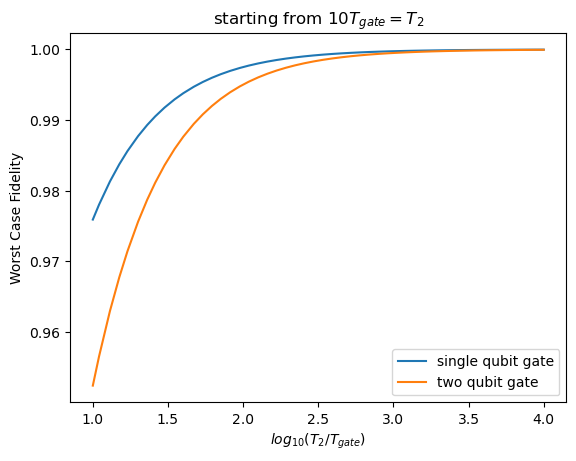

In [3]:
T2_list = list(set([int(list(np.geomspace(10,10000,nT2, endpoint=True))[i]) for i in range(nT2)]))
T2_list.sort()

plus = 1/np.sqrt(2)*(basis(2,0)+basis(2,1))
T1 = 1
f_worst_1q = []
f_worst_2q = []
start = time.time()
Tgate=1

for T2 in T2_list:

    qubit1 = InCoherentQuantumRegister(1,plus*plus.dag(), T1=1, T2 = T2, Tgate=1, dt = 1/20)
    qubit2 = InCoherentQuantumRegister(2,tensor([plus*plus.dag(),plus*plus.dag()]), T1=1, T2 = T2, Tgate=1, dt = 1/20)
    qubit1.setError(dephase = True, amplitude_damp=False)
    qubit2.setError(dephase = True, amplitude_damp=False)
    qubit2.run([[('i',None,None,1)]])
    qubit1.run([[('i',None,None,1)]])
    f_worst_1q.append(fidelity(plus*plus.dag(), qubit1.state))
    f_worst_2q.append(fidelity(tensor([plus*plus.dag(),plus*plus.dag()]), qubit2.state))


start = 0
end = 1000
plt.style.use('default')
x = np.log10(T2_list)
plt.xlabel('$log_{10}(T_2/T_{gate})$')
plt.plot(x[start:end], f_worst_1q[start:end], label = 'single qubit gate')
plt.plot(x[start:end], f_worst_2q[start:end], label = 'two qubit gate')
plt.style.use('default')
plt.ylabel('Worst Case Fidelity')
plt.title('starting from $10T_{gate}=T_2$')
plt.legend()
plt.show()

In [10]:
perfectSyndromeExtraction = False
a=0
fid = f_worst_1q

if perfectSyndromeExtraction:
    t = np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\f_t.npy'), np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\d_t.npy'), None
    l = np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\f_l.npy'), np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\d_l.npy'), np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\li_l.npy')
    ft = np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\f_ft.npy'), np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\d_ft.npy'), np.load('data\\CNOTExplore\\PerfectSyndromeExtraction\\li_ft.npy')
    start = 0
    end = 50
else:
    t = np.concatenate((np.load('data\\CNOTExplore\\f_t.npy'),np.load('data\\CNOTExplore\\f_t2.npy')[:21,:])),np.concatenate((np.load('data\\CNOTExplore\\d_t.npy'),np.load('data\\CNOTExplore\\d_t2.npy')[:21,:])),None
    l = np.concatenate((np.load('data\\CNOTExplore\\f_l.npy'),np.load('data\\CNOTExplore\\f_l2.npy')[:21,:])),np.concatenate((np.load('data\\CNOTExplore\\d_l.npy'),np.load('data\\CNOTExplore\\d_l2.npy')[:21,:])), np.concatenate((np.load('data\\CNOTExplore\\li_l.npy'),np.load('data\\CNOTExplore\\li_l2.npy')[:21,:]))
    ft = np.concatenate((np.load('data\\CNOTExplore\\f_ft.npy'),np.load('data\\CNOTExplore\\f_ft2.npy')[:21,:])),np.concatenate((np.load('data\\CNOTExplore\\d_ft.npy'),np.load('data\\CNOTExplore\\d_ft2.npy')[:21,:])), np.concatenate((np.load('data\\CNOTExplore\\li_ft.npy'),np.load('data\\CNOTExplore\\li_ft2.npy')[:21,:]))
    start = 0
    end = 46


Now we can plot the appropriate graphs. setting a=0 will plot fidelity, a=1 will plot trace distance and setting a=2 will plot lost information

also, setting f=f_worst_1q or f=f_worst_2q is an option




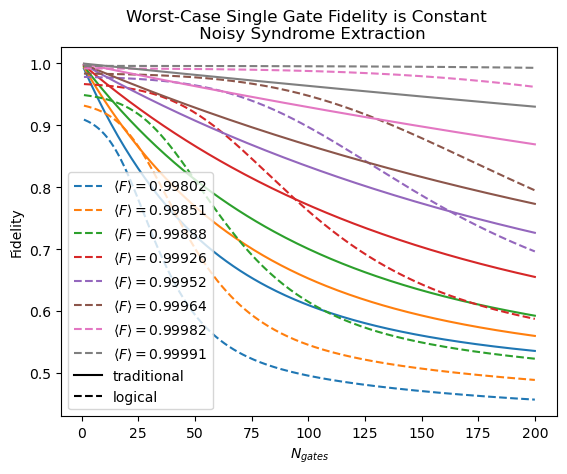

In [11]:

ng = 200
num_gates = list(set([int(list(np.linspace(1,200,ng, endpoint=True))[i]) for i in range(ng)]))
num_gates.sort()

if a==0:
    start =0
    end = 200
    plt.ylabel('Fidelity')
    if perfectSyndromeExtraction:
        indexes = [0,5,10,15,20,25,30,35,40] # these indexes correspond to worst case fidelity (T2), from 0 to 49.
    else:
        indexes = [18,20,22,25,28,30,35,40] # these indexes correspond to worst case fidelity (T2), from 0 to 49.
elif a==1:
    start =0
    end = 200
    plt.ylabel('Distance')
    better = -1
    if perfectSyndromeExtraction:
        indexes = [15,24,29,34,39,43] # these indexes correspond to worst case fidelity (T2), from 0 to 49.
        plt.ylim((0,0.02))
    else:
        indexes = [41,42,43,44,45] # these indexes correspond to worst case fidelity (T2), from 0 to 49.
        plt.ylim((0,0.006))
elif a==2:
    start = 0
    end = 50
    plt.ylabel('Lost Information')
    indexes = [1,5,10,15,20,25,30,35,40,45]

plt.style.use('default')
x = num_gates[start:end]
plt.xlabel('$N_{gates}$')
if fid == f_worst_2q and perfectSyndromeExtraction:
    plt.title('Worst-Case Entangling Gate Fidelity is Constant \n Perfect Syndrome Extraction')
elif fid == f_worst_2q and not perfectSyndromeExtraction:
    plt.title('Worst-Case Entangling Gate Fidelity is Constant \n Noisy Syndrome Extraction')
elif fid == f_worst_1q and perfectSyndromeExtraction:
    plt.title('Worst-Case Single Gate Fidelity is Constant \n Perfect Syndrome Extraction')
elif fid == f_worst_1q and not perfectSyndromeExtraction:
    plt.title('Worst-Case Single Gate Fidelity is Constant \n Noisy Syndrome Extraction')
ax = plt.gca()


for i in indexes:

    f_l = interp1d(x, l[a][i,start:end], kind='cubic')
    xnew = np.linspace(fid[start], fid[49], num=100, endpoint=True)
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(x,f_l(x), '--', label='$\\langle F\\rangle = '+str(round((10**5*fid[i]))/(10**5))+'$', color=color)
    if a!=2:
        f_t = interp1d(x, t[a][i,start:end], kind='cubic')
        plt.plot(x,f_t(x), color=color)


plt.plot(np.NaN, np.NaN, color='black', label='traditional')
plt.plot(np.NaN, np.NaN, '--', color='black', label='logical')
plt.legend()
plt.show()

Now we draw a line for the thresholds. anywhere above the line, logical control performs better.

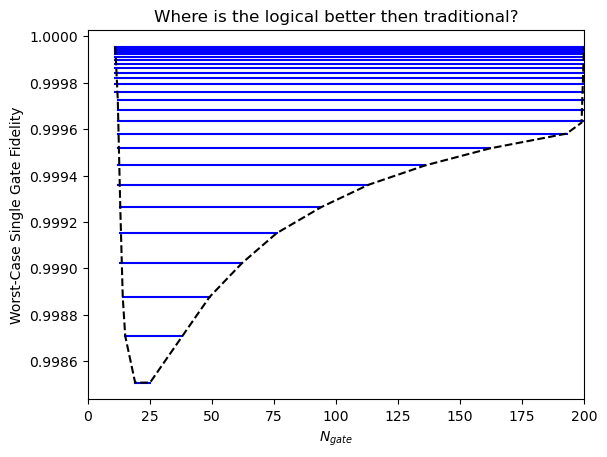

In [12]:
if a==0:
    plt.style.use('default')
    x1s = []
    x2s = []
    Ts = []
    for i,T2 in enumerate(T2_list[:]):
        try:
            x1 = np.array(num_gates)[np.argwhere((np.array(l[a][i,:])-np.array(t[a][i,:]))>0)[0]] # first index where logical is better then traditional
            x2 = np.array(num_gates)[np.argwhere((np.array(l[a][i,:])-np.array(t[a][i,:]))>0)[-1]] # last such
            if i in {0,1}:
                x2 = np.array(num_gates)[[3]]
            x1s.append(x1[0])
            x2s.append(x2[0])
            Ts.append(fid[i])
            plt.plot([x1,x2],[fid[i],fid[i]],color='b')
        except:
            pass

    x = x1s+x2s
    while len(set(x)) != len(x):
        x = [x[i] if x[i]!=x[i+1] else x[i]-0.0001 for i in range(len(x)-1)] + [x[-1]]
    f = interp1d(x, Ts+Ts, kind='linear')
    if perfectSyndromeExtraction:
        plt.plot(num_gates[3:200],f(num_gates[3:200]), '--', color='black')
    else:
        plt.plot(num_gates[10:200],f(num_gates[10:200]), '--', color='black')
    plt.ylabel('Worst-Case Single Gate Fidelity')
    plt.xlabel('$N_{gate}$')
    plt.title('Where is the logical better then traditional?')
    # plt.ylim((0.9984,1))
    plt.xlim((0,200))
    plt.show()

Now we can do the same analysis but with a constant number of gates

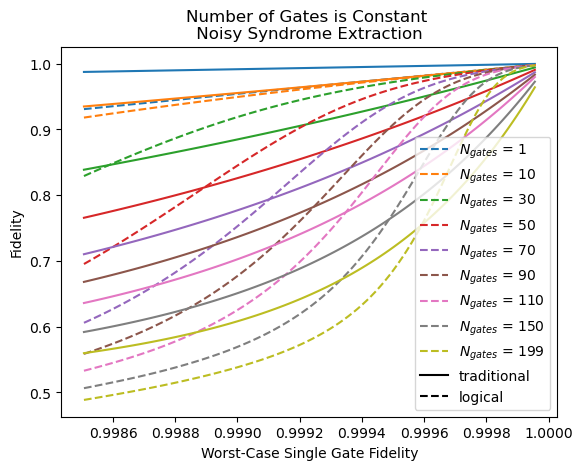

In [17]:
nT2 = 50
if perfectSyndromeExtraction:
    end = 50
else:
    end = 46
T2_list = list(set([int(list(np.geomspace(10,10000,nT2, endpoint=True))[i]) for i in range(nT2)]))
T2_list.sort()
T2_list = T2_list[0:end]
plt.style.use('default')

if a==0:
    plt.ylabel('Fidelity')
    if perfectSyndromeExtraction:
        indexes = [1,2,3,4,6,8,10,15,20,30,50,90,190] # these indexes correspond to the number of consecutive gates from 1 to 200
        start = 0
    else:
        indexes = [1,10,30,50,70,90,110,150,199] # these indexes correspond to the number of consecutive gates from 1 to 200
        start = 20
elif a==1:
    plt.ylabel('Distance')
    if perfectSyndromeExtraction:
        indexes = [5,7,9,13,17,19,30,50,100] # these indexes correspond to the number of consecutive gates from 1 to 200
        start = 15
        plt.ylim((0,0.02))
    else:
        indexes = [50,100,150,170,190,195] # these indexes correspond to the number of consecutive gates from 1 to 200
        start = 38
        plt.ylim((0.00,0.007))
        plt.xlim((0.99988,.99997))
elif a==2:
    plt.ylabel('Lost Information')
    indexes = [1,5,10,15,20,30,40,50]
    if perfectSyndromeExtraction:
        start = 20
    else:
        start = 30


x=fid[start:end]
if fid==f_worst_2q:
    plt.xlabel('Worst-Case Entangling Gate Fidelity')
else:
    plt.xlabel('Worst-Case Single Gate Fidelity')
if perfectSyndromeExtraction:
    plt.title('Number of Gates is Constant \n Perfect Syndrome Extraction ')
else:
    plt.title('Number of Gates is Constant \n Noisy Syndrome Extraction ')
ax = plt.gca()

for ng in indexes:

    f_l = interp1d(x, l[a][start:,ng], kind='cubic')
    xnew = np.linspace(fid[start], fid[45], num=100, endpoint=True)
    color = next(ax._get_lines.prop_cycler)['color']
    if a!=2:
        f_t = interp1d(x, t[a][start:,ng], kind='cubic')
        plt.plot(xnew,f_t(xnew), color=color)
    plt.plot(xnew,f_l(xnew), '--', label='$N_{gates}$ = '+str(ng), color=color)

plt.plot(np.NaN, np.NaN, color='black', label='traditional')
plt.plot(np.NaN, np.NaN, '--', color='black', label='logical')
plt.legend()
plt.show()

Now we draw a line for the thresholds. anywhere above the line, logical control performs better.

for some reason, it doesn't work for fid = f_worst_2q

In [18]:
ng=200
start = 0
num_gates = list(set([int(list(np.linspace(1,ng,ng, endpoint=True))[i]) for i in range(ng)]))
num_gates.sort()
thresholds = []
x=fid[0:end]
xnew = np.linspace(fid[0], fid[end-1], num=1000, endpoint=True)
for ng in num_gates:
    try:
        f_t = interp1d(x, t[a][start:end,ng], kind='cubic')
        f_l = interp1d(x, l[a][start:end,ng], kind='cubic')

        index = next(x[0] for x in enumerate(list(f_l(xnew))) if x[1] > list(f_t(xnew))[x[0]]) # find first index where L1>L2
        if (index < 100  and ng > 10):
            thresholds.append(thresholds[-1])
        else:
            thresholds.append(xnew[index])
        if ng == 175:
            print(ng, thresholds[-1], index)
        # print(ng)
    except:
        thresholds.append(1.5)

175 0.9995710872124852 983


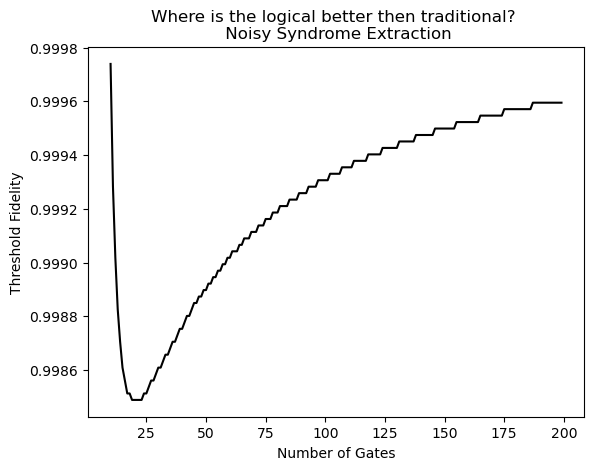

In [20]:
if a==0:
    if perfectSyndromeExtraction:
        plt.title('Where is the logical better then traditional? \n Perfect Syndrome Extraction')
    else:
        plt.title('Where is the logical better then traditional? \n Noisy Syndrome Extraction')
    start = 0
    end = 100
    num_gates = np.array(num_gates)
    thresholds = np.array(thresholds)
    plt.plot(num_gates[thresholds<1.5],thresholds[thresholds<1.5], color='black')
    plt.ylabel('Threshold Fidelity')
    plt.xlabel('Number of Gates')
    # plt.ylim(0.9984,0.9999)
    # plt.xlim(0,210)

The next graphs are just JUNK

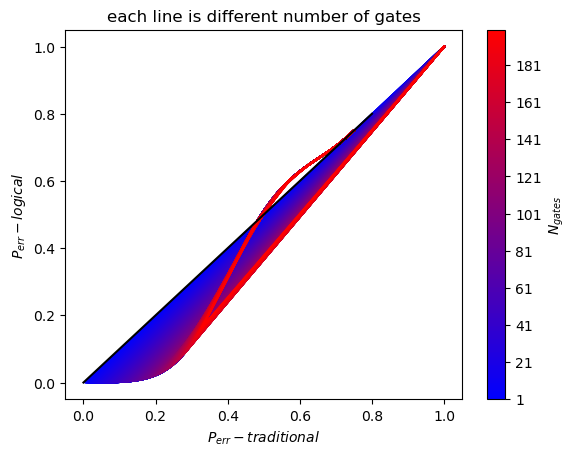

In [53]:
import matplotlib as mpl
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
nT2 = 50
end = 50
T2_list = list(set([int(list(np.geomspace(10,10000,nT2, endpoint=True))[i]) for i in range(nT2)]))
T2_list.sort()
T2_list = T2_list[0:end]

# def func(x,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15):
#     return a1 + a2*x + a3*x**2 + a4*x**3 + a5*x**4 + a6*x**5 + a7*x**6 + a8*x**7 + a9*x**8 + a10*x**9 + a11*x**10 + a12*x**11 + a13*x**12 + a14*x**13 + a15*x**14
min = num_gates[0]
max = num_gates[-1]
# Setting up a colormap that's a simple transtion
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
step=1
levels = range(min,max+step,step)
Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()

plt.style.use('default')
plt.title('each line is different number of gates')

start = 0
x=fid[start:end]
plt.xlabel('$P_{err} - traditional$')
plt.ylabel('$P_{err} - logical$')
ax = plt.gca()

for ng in list(num_gates)[:-1]:
# for ng in [10,30,50,70,90,110,130,150,170,190]:
    # popt_t, pcov = curve_fit(func, x, t[0][start:,ng])
    # print(popt_t)
    # popt_l, pcov = curve_fit(func, x, l[0][start:,ng])
    # print(popt_l)
    # setting rgb color based on z normalized to my range
    r = ((float(ng)-min)/(max-min))**(1/1)
    if r>1:
        r=1
    g = 0
    b = 1-r
    f_t = interp1d(x, t[0][start:,ng], kind='cubic')
    f_l = interp1d(x, l[0][start:,ng], kind='cubic')
    xnew = np.linspace(fid[start], fid[end-1], num=100, endpoint=True)
    # color = next(ax._get_lines.prop_cycler)['color']
    # plt.scatter(x, t[0][start:,ng],  label='ng = '+str(ng), color=color)
    plt.plot(1-(f_t(xnew))**2,1-(f_l(xnew))**2,  label='ng = '+str(ng), color=(r,g,b))
    # color = next(ax._get_lines.prop_cycler)['color']
    # plt.scatter(x, l[0][start:,ng], color=color)
    # plt.plot(xnew,f_l(xnew), '--', color=color)
    # plt.plot(x, ft[0][:,ng], '--', label='ft ng = '+str(ng), color=color)
plt.plot([0,0.8],[0,0.8],label='x=y',color='black')
# plt.legend()
plt.colorbar(CS3, label = '$N_{gates}$') # using the colorbar info I got from contourf
plt.show()

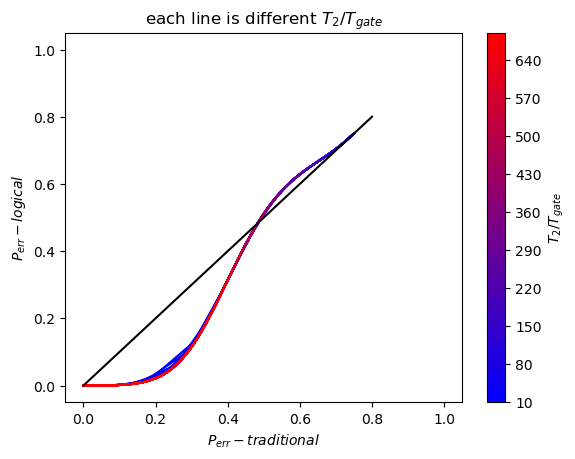

In [54]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
ng = 200
a = 0
num_gates = list(set([int(list(np.linspace(1,200,ng, endpoint=True))[i]) for i in range(ng)]))
num_gates.sort()
start = 0
end = 200

min = T2_list[0]
max = T2_list[-20]
# Setting up a colormap that's a simple transtion
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
step=5
levels = range(min,max+step,step)
Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()


plt.style.use('default')
plt.title('each line is different $T_2/T_{gate}$')
x = num_gates[start:end]
plt.xlabel('$P_{err} - traditional$')
plt.ylabel('$P_{err} - logical$')
for i,T2 in enumerate(T2_list):
    # popt_t, pcov = curve_fit(func, x, t[0][start:,ng])
    # print(popt_t)
    # popt_l, pcov = curve_fit(func, x, l[0][start:,ng])
    # print(popt_l)
    # setting rgb color based on z normalized to my range
    r = ((float(T2)-min)/(max-min))**(1/1)
    if r>1:
        r=1
    g = 0
    b = 1-r

    f_t = interp1d(x, t[0][i,:], kind='cubic')
    f_l = interp1d(x, l[0][i,:], kind='cubic')
    xnew = np.linspace(fid[start], fid[45], num=100, endpoint=True)
    color = next(ax._get_lines.prop_cycler)['color']
    # plt.scatter(x, t[0][start:,ng],  label='ng = '+str(ng), color=color)
    plt.plot(1-(f_t(x))**2,1-(f_l(x))**2,  label='$T_2/T_{gate} = '+str(T2_list[i])+'$', color=(r,g,b))
    # color = next(ax._get_lines.prop_cycler)['color']
    # plt.scatter(x, l[0][start:,ng], color=color)
    # plt.plot(x,f_l(x), '--', color=color)
    # plt.plot(x, ft[0][:,ng], '--', label='ft ng = '+str(ng), color=color)

plt.plot([0,0.8],[0,0.8],label='x=y',color='black')
# plt.legend()
plt.colorbar(CS3, label = '$T_2/T_{gate}$') # using the colorbar info I got from contourf
plt.show()




# To Create The Data
### DELETE manually (for safety) the folders with a number for a name in the folder 'CNOTExplore' in 'data'. But DONT DO IT it takes about a week to produce all that data.
#### Creating the data was done in the following way:

we first chose a maximun number of gates ng to be 200,

and take nT2 to be 50.

the use of those parameters is explained in the documentation of 'CNOTExplore' and 'getData' functions in the beginning of this notebook.

now, to create the data, just run:

t, l, ft = CNOTExplore(200,50)

t2, l2, ft2 = getData(200,50)

